## <font style="color:lightblue">Feature scaling and KNN

Consider the data from CSV file weight-height.csv.

<font style="color:lightblue">0) Read data into a pandas dataframe.


In [4]:
import pandas as pd

df = pd.read_csv('weight-height.csv', skiprows=0, delimiter=",")
df.keys()

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801



<font style="color:lightblue">1) Pick the target variable y as weight in kilograms, and the feature variable X as height in centimeters.


In [6]:
X = 2.54*df[['Height']]
y = 0.4535924*df[['Weight']]


<font style="color:lightblue">2) Split the data into training and testing sets with 80/20 ratio.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
print(X_train.shape,X_test.shape)


(8000, 1) (2000, 1)



<font style="color:lightblue">3) Scale the training and testing data using normalization and standardization.


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)


<font style="color:lightblue">4) Fit a KNN regression model with k=5 to the training data without scaling, predict on unscaled testing data and compute the R2 value.


In [9]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_unscaled = knn.predict(X_test)
r2_unscaled = knn.score(X_test, y_test)


<font style="color:lightblue">5) Repeat step 4 for normalized data.


In [10]:
knn.fit(X_train_norm, y_train)
y_pred_norm = knn.predict(X_test_norm)
r2_norm = knn.score(X_test_norm, y_test)


<font style="color:lightblue">6) Repeat step 4 for standardize data.


In [11]:
knn.fit(X_train_std, y_train)
y_pred_std  = knn.predict(X_test_std)
r2_std = knn.score(X_test_std, y_test)


<font style="color:lightblue">7) Compare the models in terms of their R2 value.

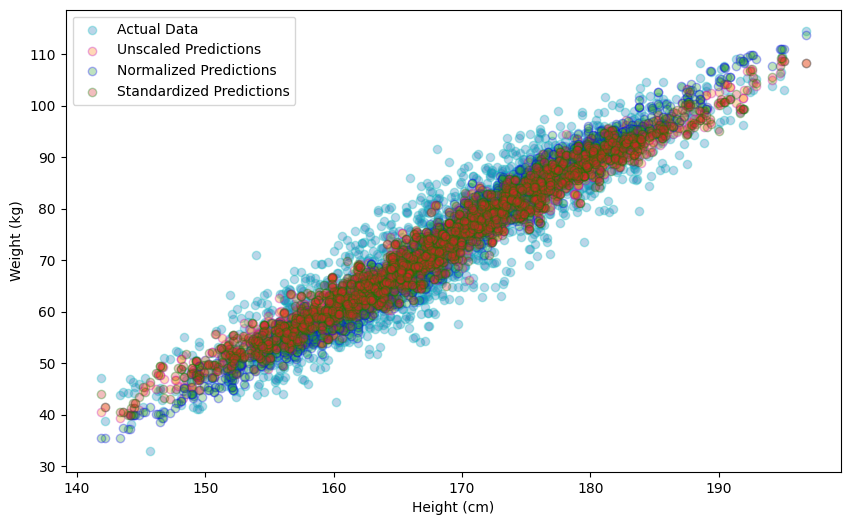

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, edgecolors='c', label='Actual Data')
plt.scatter(X_test, y_pred_unscaled, alpha=0.3, edgecolors='m', label='Unscaled Predictions')
plt.scatter(X_test, y_pred_norm,  alpha=0.3, edgecolors='b', label='Normalized Predictions')
plt.scatter(X_test, y_pred_std,  alpha=0.3, edgecolors='g', label='Standardized Predictions')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()




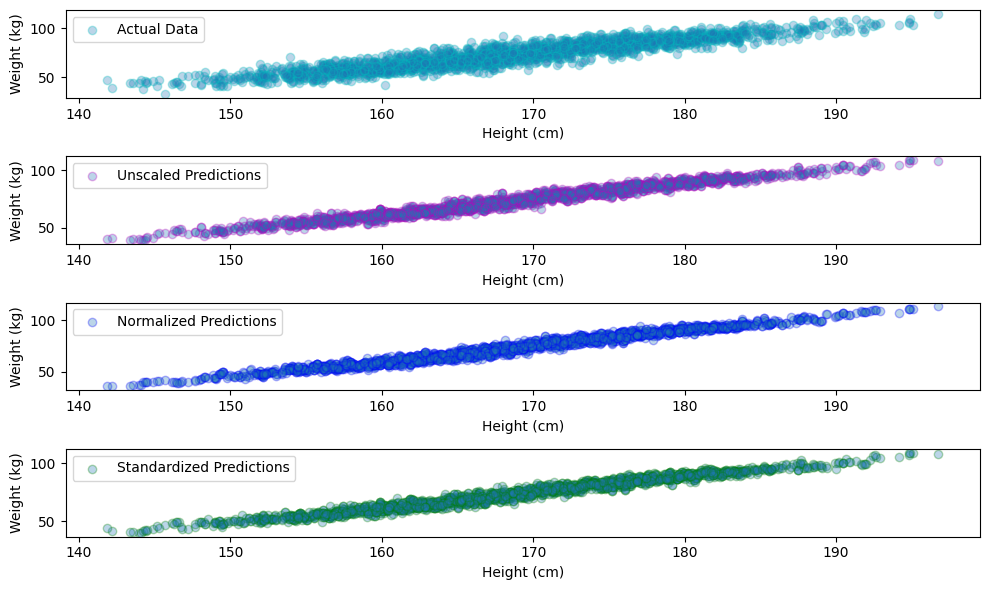

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.scatter(X_test, y_test, alpha=0.3, edgecolors='c', label='Actual Data')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_test, y_pred_unscaled, alpha=0.3, edgecolors='m', label='Unscaled Predictions')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_test, y_pred_norm, alpha=0.3, edgecolors='b', label='Normalized Predictions')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.subplot(4, 1, 4)
plt.scatter(X_test, y_pred_std,  alpha=0.3, edgecolors='g', label='Standardized Predictions')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
compare = {
    "Unscaled": r2_unscaled,
    "Normalized": r2_norm,
    "Standardized": r2_std
}

print("R2 values:")
for scale, r2_value in compare.items():
    print(f"{scale}: {r2_value}")

R2 values:
Unscaled: 0.8327437044707435
Normalized: 0.8278178089184237
Standardized: 0.834295815520114
